<a href="https://colab.research.google.com/github/AkshatMadhani/AI-Mageddon/blob/main/cyber_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [6]:
training=pd.read_csv('train.csv')

In [7]:
testing=pd.read_csv('testdata.csv')

In [8]:
training

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17,0.03,0.17.1,0.25,0.26,0.27,0.05,0.28,normal
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125968,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [9]:
updated_col_names = ["duration","category","service","attribute","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


In [10]:
training = pd.read_csv("train.csv", header=None, names = updated_col_names)
testing = pd.read_csv("testdata.csv", header=None, names = updated_col_names)

In [11]:

print('Training set:')
for col_name in training.columns:
    if training[col_name].dtypes == 'object' :
        unique_cat = len(training[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()
print('Distribution of service:')
print(training['service'].value_counts().sort_values(ascending=False).head())


Training set:
Feature 'category' has 3 categories
Feature 'service' has 70 categories
Feature 'attribute' has 11 categories
Feature 'label' has 23 categories

Distribution of service:
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: count, dtype: int64


In [12]:
print('Test set:')
for col_name in testing.columns:
    if testing[col_name].dtypes == 'object' :
        unique_cat = len(testing[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))


Test set:
Feature 'category' has 3 categories
Feature 'service' has 64 categories
Feature 'attribute' has 11 categories
Feature 'label' has 38 categories


In [13]:
categorical_columns=['category ', 'service', 'attribute']
categorical_columns=['category', 'service', 'attribute']
train_categorical_values = training[categorical_columns]
test_categorical_values = testing[categorical_columns]


In [14]:
train_categorical_values.head()

,category,service,attribute
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [15]:
unique_category=sorted(training.category.unique())
string1 = 'category'
unique_category1=[string1 + x for x in unique_category]
unique_service=sorted(training.service.unique())
string2 = 'service_'
unique_service1=[string2 + x for x in unique_service]
unique_attribute=sorted(training.attribute.unique())
string3 = 'attribute'
unique_attribute1=[string3 + x for x in unique_attribute]
combine=unique_category1 + unique_service1 + unique_attribute1
print(combine)

unique_service_test=sorted(testing.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testcombines=unique_category1 + unique_service2_test + unique_attribute1


['categoryicmp', 'categorytcp', 'categoryudp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'service_rje', 'service

In [16]:
dataset_train_categorical_values_enc=train_categorical_values.apply(LabelEncoder().fit_transform)
print(dataset_train_categorical_values_enc.head())
dataset_test_categorical_values_enc=test_categorical_values.apply(LabelEncoder().fit_transform)

   category  service  attribute
0         1       20          9
1         2       44          9
2         1       49          5
3         1       24          9
4         1       24          9


In [17]:
ohe = OneHotEncoder()
dataset_train_categorical_values_encenc = ohe.fit_transform(dataset_train_categorical_values_enc)
dataset_train_cat_data = pd.DataFrame(dataset_train_categorical_values_encenc.toarray(),columns=combine)
dataset_test_categorical_values_encenc = ohe.fit_transform(dataset_test_categorical_values_enc)
dataset_test_cat_data = pd.DataFrame(dataset_test_categorical_values_encenc.toarray(),columns=testcombines)



In [18]:
dataset_train_cat_data.head()

,categoryicmp,categorytcp,categoryudp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,attributeREJ,attributeRSTO,attributeRSTOS0,attributeRSTR,attributeS0,attributeS1,attributeS2,attributeS3,attributeSF,attributeSH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
trainservice=training['service'].tolist()
testservice= testing['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference


['service_http_8001',
 'service_http_2784',
 'service_harvest',
 'service_aol',
 'service_urh_i',
 'service_red_i']

In [20]:
for col in difference:
    dataset_test_cat_data[col] = 0

dataset_test_cat_data.shape

(22544, 84)

In [21]:
newdf=training.join(dataset_train_cat_data)
newdf.drop('attribute', axis=1, inplace=True)
newdf.drop('category', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
newdf_test=training.join(dataset_test_cat_data)
newdf_test.drop('attribute', axis=1, inplace=True)
newdf_test.drop('category', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf.shape)
print(newdf_test.shape)

(125973, 123)
(125973, 123)


In [22]:
labeldf=newdf['label']
labeldf_test=newdf_test['label']
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test
print(newdf['label'].head())


<ipython-input-22-1b139baab6b9>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,


0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64


<ipython-input-22-1b139baab6b9>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,


In [23]:
to_drop_Flooding = [2,3,4]
to_drop_Scanning  = [1,3,4]
to_drop_Intrusion  = [1,2,4]
to_drop_Privilege  = [1,2,3]
Flooding_df=newdf[~newdf['label'].isin(to_drop_Flooding)];
Scanning_df=newdf[~newdf['label'].isin(to_drop_Scanning)];
Intrusion_df=newdf[~newdf['label'].isin(to_drop_Intrusion)];
Privilege_df=newdf[~newdf['label'].isin(to_drop_Privilege)];

Flooding_df_test=newdf_test[~newdf_test['label'].isin(to_drop_Flooding)];
Scanning_df_test=newdf_test[~newdf_test['label'].isin(to_drop_Scanning)];
Intrusion_df_test=newdf_test[~newdf_test['label'].isin(to_drop_Intrusion)];
Privilege_df_test=newdf_test[~newdf_test['label'].isin(to_drop_Privilege)];
print('Train:')
print('Dimensions of Flooding :' ,Flooding_df.shape)
print('Dimensions of Scanning:',Scanning_df.shape)
print('Dimensions of Intrusion:' ,Intrusion_df.shape)
print('Dimensions of Privilege:' ,Privilege_df.shape)
print('Test:')
print('Dimensions of Flooding:' ,Flooding_df_test.shape)
print('Dimensions of Scanning:' ,Scanning_df_test.shape)
print('Dimensions of Intrusion:' ,Intrusion_df_test.shape)
print('Dimensions of Privilege:' ,Privilege_df_test.shape)

Train:
Dimensions of Flooding : (113270, 123)
Dimensions of Scanning: (78999, 123)
Dimensions of Intrusion: (68338, 123)
Dimensions of Privilege: (67395, 123)
Test:
Dimensions of Flooding: (113270, 123)
Dimensions of Scanning: (78999, 123)
Dimensions of Intrusion: (68338, 123)
Dimensions of Privilege: (67395, 123)


In [24]:
X_Flooding = Flooding_df.drop('label',axis=1)
Y_Flooding = Flooding_df.label
X_Scanning = Scanning_df.drop('label',axis=1)
Y_Scanning = Scanning_df.label
X_Privilege = Privilege_df.drop('label',axis=1)
Y_Privilege = Privilege_df.label
X_Intrusion = Intrusion_df.drop('label',axis=1)
Y_Intrusion = Intrusion_df.label
# test set
X_Flooding_test = Flooding_df.drop('label',axis=1)
Y_Flooding_test = Flooding_df_test.label
X_Scanning_test = Scanning_df_test.drop('label',axis=1)
Y_Scanning_test = Scanning_df_test.label
X_Privilege_test = Privilege_df_test.drop('label',axis=1)
Y_Privilege_test = Privilege_df_test.label
X_Intrusion_test = Intrusion_df_test.drop('label',axis=1)
Y_Intrusion_test = Intrusion_df_test.label

In [25]:
colNames=list(X_Flooding)
colNames_test=list(X_Flooding_test)

In [26]:
scaler1 = preprocessing.StandardScaler().fit(X_Flooding)
X_Flooding=scaler1.transform(X_Flooding)
scaler2 = preprocessing.StandardScaler().fit(X_Scanning)
X_Scanning=scaler2.transform(X_Scanning)
scaler3 = preprocessing.StandardScaler().fit(X_Privilege)
X_Privilege=scaler3.transform(X_Privilege)
scaler4 = preprocessing.StandardScaler().fit(X_Intrusion)
X_Intrusion=scaler4.transform(X_Intrusion)
# test data
scaler5 = preprocessing.StandardScaler().fit(X_Flooding_test)
X_Flooding_test=scaler5.transform(X_Flooding_test)
scaler6 = preprocessing.StandardScaler().fit(X_Scanning_test)
X_Scanning_test=scaler6.transform(X_Scanning_test)
scaler7 = preprocessing.StandardScaler().fit(X_Privilege_test)
X_Privilege_test=scaler7.transform(X_Privilege_test)
scaler8 = preprocessing.StandardScaler().fit(X_Intrusion_test)
X_Intrusion_test=scaler8.transform(X_Intrusion_test)


In [27]:
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=10)
X_newFlooding = selector.fit_transform(X_Flooding,Y_Flooding)
X_newFlooding.shape


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 16  44  63  66  68  86 114] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(113270, 13)

In [28]:
true=selector.get_support()
newcolindex_Flooding=[i for i, x in enumerate(true) if x]
newcolname_Flooding=list( colNames[i] for i in newcolindex_Flooding)
newcolname_Flooding

['logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_http',
 'attributeS0',
 'attributeSF']

In [29]:
X_newScanning = selector.fit_transform(X_Scanning,Y_Scanning)
X_newScanning.shape

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 4 16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(78999, 13)

In [30]:
true=selector.get_support()
newcolindex_Scanning=[i for i, x in enumerate(true) if x]
newcolname_Scanning=list( colNames[i] for i in newcolindex_Scanning )
newcolname_Scanning

['logged_in',
 'rerror_rate',
 'srv_rerror_rate',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'categoryicmp',
 'service_eco_i',
 'service_private',
 'attributeSF']

In [31]:
X_newPrivilege = selector.fit_transform(X_Privilege,Y_Privilege)
X_newPrivilege.shape

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [  4  16  43  44  46  47  48  49  50  51  54  57  58  62  63  64  66  67
  68  70  71  72  73  74  75  76  77  78  79  80  81  82  83  86  87  89
  92  93  96  98  99 100 107 108 109 110 114] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(67395, 13)

In [32]:
true=selector.get_support()
newcolindex_Privilege=[i for i, x in enumerate(true) if x]
newcolname_Privilege=list( colNames[i] for i in newcolindex_Privilege)
newcolname_Privilege

['urgent',
 'hot',
 'root_shell',
 'num_file_creations',
 'num_shells',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'service_ftp_data',
 'service_http',
 'service_telnet']

In [33]:
X_newIntrusion = selector.fit_transform(X_Intrusion,Y_Intrusion)
X_newIntrusion.shape

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [  4  16  43  44  46  47  48  49  50  51  54  57  58  62  63  64  66  67
  68  70  71  72  73  74  76  77  78  79  80  81  82  83  86  87  89  92
  93  96  98  99 100 107 108 109 110 114] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(68338, 13)

In [34]:
true=selector.get_support()
newcolindex_Intrusion=[i for i, x in enumerate(true) if x]
newcolname_Intrusion=list( colNames[i] for i in newcolindex_Intrusion)
newcolname_Intrusion

['src_bytes',
 'dst_bytes',
 'hot',
 'num_failed_logins',
 'is_guest_login',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'service_ftp',
 'service_ftp_data',
 'service_http',
 'service_imap4',
 'attributeRSTO']

In [35]:
print('Features  for Flooding:',newcolname_Flooding)
print()
print('Features  for Scanning:',newcolname_Scanning)
print()
print('Features  for R2L:',newcolname_Privilege)
print()
print('Features for Intrusion:',newcolname_Intrusion)

Features  for Flooding: ['logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_http', 'attributeS0', 'attributeSF']

Features  for Scanning: ['logged_in', 'rerror_rate', 'srv_rerror_rate', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'categoryicmp', 'service_eco_i', 'service_private', 'attributeSF']

Features  for R2L: ['urgent', 'hot', 'root_shell', 'num_file_creations', 'num_shells', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service_ftp_data', 'service_http', 'service_telnet']

Features for Intrusion: ['src_bytes', 'dst_bytes', 'hot', 'num_failed_logins', 'is_guest_login', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_

In [36]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_newFlooding, Y_Flooding.astype('int'))
print ("Flooding Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_),newcolname_Flooding)))



Flooding Features sorted by their rank:
[(1, 'same_srv_rate'), (2, 'count'), (3, 'attributeSF'), (4, 'dst_host_serror_rate'), (5, 'dst_host_same_srv_rate'), (6, 'dst_host_srv_count'), (7, 'dst_host_count'), (8, 'logged_in'), (9, 'serror_rate'), (10, 'dst_host_srv_serror_rate'), (11, 'srv_serror_rate'), (12, 'service_http'), (13, 'attributeS0')]


In [37]:
rfe.fit(X_newScanning, Y_Scanning.astype(int))
print ("Scanning Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Scanning)))

Scanning Features sorted by their rank:
[(1, 'dst_host_same_src_port_rate'), (2, 'dst_host_srv_count'), (3, 'dst_host_rerror_rate'), (4, 'service_private'), (5, 'logged_in'), (6, 'dst_host_diff_srv_rate'), (7, 'dst_host_srv_diff_host_rate'), (8, 'attributeSF'), (9, 'service_eco_i'), (10, 'rerror_rate'), (11, 'categoryicmp'), (12, 'dst_host_srv_rerror_rate'), (13, 'srv_rerror_rate')]


In [38]:

rfe.fit(X_newIntrusion, Y_Intrusion.astype(int))

print ("Intrusion Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Intrusion)))

Intrusion Features sorted by their rank:
[(1, 'src_bytes'), (2, 'dst_bytes'), (3, 'hot'), (4, 'dst_host_srv_diff_host_rate'), (5, 'service_ftp_data'), (6, 'dst_host_same_src_port_rate'), (7, 'dst_host_srv_count'), (8, 'num_failed_logins'), (9, 'service_imap4'), (10, 'is_guest_login'), (11, 'service_ftp'), (12, 'attributeRSTO'), (13, 'service_http')]


In [39]:
rfe.fit(X_newPrivilege, Y_Privilege.astype(int))

print ("Privilege Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Privilege)))

Privilege Features sorted by their rank:
[(1, 'hot'), (2, 'dst_host_srv_count'), (3, 'dst_host_count'), (4, 'root_shell'), (5, 'num_shells'), (6, 'service_ftp_data'), (7, 'dst_host_srv_diff_host_rate'), (8, 'num_file_creations'), (9, 'dst_host_same_src_port_rate'), (10, 'service_telnet'), (11, 'srv_diff_host_rate'), (12, 'service_http'), (13, 'urgent')]


In [40]:
from sklearn.feature_selection import RFE
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=13, step=1)
rfe.fit(X_Flooding, Y_Flooding.astype(int))
X_rfeFlooding=rfe.transform(X_Flooding)
true=rfe.support_
rfecolindex_Flooding=[i for i, x in enumerate(true) if x]
rfecolname_Flooding=list(colNames[i] for i in rfecolindex_Flooding)


In [41]:
rfe.fit(X_Scanning, Y_Scanning.astype(int))
X_rfeProbe=rfe.transform(X_Scanning)
true=rfe.support_
rfecolindex_Scanning=[i for i, x in enumerate(true) if x]
rfecolname_Scanning=list(colNames[i] for i in rfecolindex_Scanning)

In [42]:
rfe.fit(X_Intrusion, Y_Intrusion.astype(int))
X_rfeR2L=rfe.transform(X_Intrusion)
true=rfe.support_
rfecolindex_Intrusion=[i for i, x in enumerate(true) if x]
rfecolname_Intrusion=list(colNames[i] for i in rfecolindex_Intrusion)

In [43]:
rfe.fit(X_Privilege, Y_Privilege.astype(int))
X_rfeU2R=rfe.transform(X_Privilege)
true=rfe.support_
rfecolindex_Privilege=[i for i, x in enumerate(true) if x]
rfecolname_Privilege=list(colNames[i] for i in rfecolindex_Privilege)

In [44]:
print('Features selected for Flooding:',rfecolname_Flooding)
print()
print('Features selected for Scanning:',rfecolname_Scanning)
print()
print('Features selected for Intrusion:',rfecolname_Intrusion)
print()
print('Features selected for Privilege:',rfecolname_Privilege)


Features selected for DoS: ['src_bytes', 'dst_bytes', 'wrong_fragment', 'num_compromised', 'same_srv_rate', 'diff_srv_rate', 'dst_host_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_ecr_i', 'attributeRSTR', 'attributeS0']

Features selected for Probe: ['src_bytes', 'dst_bytes', 'rerror_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'service_finger', 'service_ftp_data', 'service_http', 'service_private', 'service_smtp', 'service_telnet']

Features selected for R2L: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_failed_logins', 'num_access_files', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service_ftp_data', 'service_imap4']

Features selected for U2R: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'root_shell', 'num_file_creations', 'num_shells', 'srv_count', 'dst_host_count', 'dst_host

In [45]:
clf_Flodding=DecisionTreeClassifier(random_state=0)
clf_Scanning=DecisionTreeClassifier(random_state=0)
clf_Intrusion=DecisionTreeClassifier(random_state=0)
clf_Privilege=DecisionTreeClassifier(random_state=0)
clf_Flodding.fit(X_Flooding, Y_Flooding.astype(int))
clf_Scanning.fit(X_Scanning, Y_Scanning.astype(int))
clf_Intrusion.fit(X_Intrusion, Y_Intrusion.astype(int))
clf_Privilege.fit(X_Privilege, Y_Privilege.astype(int))

DecisionTreeClassifier(random_state=0)

In [46]:
clf_Flodding.predict(X_Flooding_test)

array([0, 0, 1, ..., 0, 1, 0])

In [47]:
clf_Flodding.predict_proba(X_Flooding_test)[0:20]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [48]:
Y_Flooding_pred=clf_Flodding.predict(X_Flooding_test)
pd.crosstab(Y_Flooding_test, Y_Flooding_pred, rownames=['ReaL attacks'], colnames=[' Estimated attacks'])

Estimated attacks,0,1
ReaL attacks,,
0,67343,0
1,5,45922


In [49]:
Y_Scanning_pred=clf_Scanning.predict(X_Scanning_test)
pd.crosstab(Y_Scanning_test, Y_Scanning_pred, rownames=['Real attacks'], colnames=['Estimated attacks'])

Estimated attacks,0,2
Real attacks,,
0,63546,3797
2,327,11329


In [50]:
Y_Intrusion_pred=clf_Intrusion.predict(X_Intrusion_test)
pd.crosstab(Y_Intrusion_test, Y_Intrusion_pred, rownames=['Real attacks'], colnames=['Estimated attacks'])

Estimated attacks,0,3
Real attacks,,
0,67325,18
3,562,433


In [51]:
Y_Privilege_pred=clf_Privilege.predict(X_Privilege_test)
pd.crosstab(Y_Privilege_test, Y_Privilege_pred, rownames=['Real attacks'], colnames=['Estimated attacks'])

Estimated attacks,0,4
Real attacks,,
0,67340,3
4,14,38


In [52]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_Flodding, X_Flooding_test, Y_Flooding_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f " % (accuracy.mean()))
precision = cross_val_score(clf_Flodding, X_Flooding_test, Y_Flooding_test, cv=10, scoring='precision')
print("Precision: %0.5f " % (precision.mean()))
recall = cross_val_score(clf_Flodding, X_Flooding_test, Y_Flooding_test, cv=10, scoring='recall')
print("Recall: %0.5f " % (recall.mean()))
f = cross_val_score(clf_Flodding, X_Flooding_test, Y_Flooding_test, cv=10, scoring='f1')
print("F-measure: %0.5f " % (f.mean()))

Accuracy: 0.99974 
Precision: 0.99963 
Recall: 0.99972 
F-measure: 0.99967 


In [53]:
accuracy = cross_val_score(clf_Scanning, X_Scanning_test, Y_Scanning_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f" % (accuracy.mean()))
precision = cross_val_score(clf_Scanning, X_Scanning_test, Y_Scanning_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f " % (precision.mean()))
recall = cross_val_score(clf_Scanning, X_Scanning_test, Y_Scanning_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f " % (recall.mean()))
f = cross_val_score(clf_Scanning, X_Scanning_test, Y_Scanning_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f " % (f.mean()))

Accuracy: 0.99832
Precision: 0.99640 
Recall: 0.99692 
F-measure: 0.99666 


In [54]:
accuracy = cross_val_score(clf_Intrusion, X_Intrusion_test, Y_Intrusion_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f" % (accuracy.mean()))
precision = cross_val_score(clf_Intrusion, X_Intrusion_test, Y_Intrusion_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f " % (precision.mean()))
recall = cross_val_score(clf_Intrusion, X_Intrusion_test, Y_Intrusion_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f " % (recall.mean()))
f = cross_val_score(clf_Intrusion, X_Intrusion_test, Y_Intrusion_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f " % (f.mean()))

Accuracy: 0.99899
Precision: 0.98283 
Recall: 0.98217 
F-measure: 0.98242 


In [55]:
accuracy = cross_val_score(clf_Privilege, X_Privilege_test, Y_Privilege_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f" % (accuracy.mean()))
precision = cross_val_score(clf_Privilege, X_Privilege_test, Y_Privilege_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f " % (precision.mean()))
recall = cross_val_score(clf_Privilege, X_Privilege_test, Y_Privilege_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f " % (recall.mean()))
f = cross_val_score(clf_Privilege, X_Privilege_test, Y_Privilege_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f " % (f.mean()))


Accuracy: 0.99935
Precision: 0.82295 
Recall: 0.80982 
F-measure: 0.79500 


In [56]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import RFE
clf1 = RandomForestClassifier(n_jobs=2, random_state=0)

rfe = RFE(clf1, n_features_to_select=1)
rfe.fit(X_newFlooding, Y_Flooding.astype('int'))
print ("Flooding Features sorted by  rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Flooding)))



Flooding Features sorted by  rank:
[(1, 'same_srv_rate'), (2, 'dst_host_srv_serror_rate'), (3, 'attributeSF'), (4, 'count'), (5, 'dst_host_serror_rate'), (6, 'attributeS0'), (7, 'serror_rate'), (8, 'dst_host_same_srv_rate'), (9, 'dst_host_srv_count'), (10, 'srv_serror_rate'), (11, 'dst_host_count'), (12, 'logged_in'), (13, 'service_http')]


In [57]:
rfe.fit(X_newScanning, Y_Scanning.astype(int))
print ("Scanning Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Scanning)))

Scanning Features sorted by their rank:
[(1, 'dst_host_same_src_port_rate'), (2, 'dst_host_diff_srv_rate'), (3, 'service_private'), (4, 'dst_host_srv_diff_host_rate'), (5, 'dst_host_srv_rerror_rate'), (6, 'dst_host_srv_count'), (7, 'service_eco_i'), (8, 'dst_host_rerror_rate'), (9, 'categoryicmp'), (10, 'rerror_rate'), (11, 'logged_in'), (12, 'attributeSF'), (13, 'srv_rerror_rate')]


In [58]:
rfe.fit(X_newIntrusion, Y_Intrusion.astype(int))

print ("Intrusion Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Intrusion)))

Intrusion Features sorted by their rank:
[(1, 'src_bytes'), (2, 'hot'), (3, 'dst_bytes'), (4, 'dst_host_same_src_port_rate'), (5, 'service_ftp_data'), (6, 'dst_host_srv_diff_host_rate'), (7, 'dst_host_srv_count'), (8, 'is_guest_login'), (9, 'service_ftp'), (10, 'num_failed_logins'), (11, 'service_http'), (12, 'attributeRSTO'), (13, 'service_imap4')]


In [59]:
rfe.fit(X_newPrivilege, Y_Privilege.astype(int))

print ("Privilege Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Privilege)))

Privilege Features sorted by their rank:
[(1, 'hot'), (2, 'dst_host_srv_count'), (3, 'dst_host_count'), (4, 'num_file_creations'), (5, 'root_shell'), (6, 'dst_host_same_src_port_rate'), (7, 'dst_host_srv_diff_host_rate'), (8, 'service_ftp_data'), (9, 'num_shells'), (10, 'service_telnet'), (11, 'urgent'), (12, 'service_http'), (13, 'srv_diff_host_rate')]


In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
clf3 = KNeighborsClassifier()
rfe = RFE(clf3, n_features_to_select=13)
rfe.fit(X_newFlooding, Y_Flooding.astype('int'))
print ("Flooding Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Flooding)))

Flooding Features sorted by their rank:
[(1, 'attributeS0'), (1, 'attributeSF'), (1, 'count'), (1, 'dst_host_count'), (1, 'dst_host_same_srv_rate'), (1, 'dst_host_serror_rate'), (1, 'dst_host_srv_count'), (1, 'dst_host_srv_serror_rate'), (1, 'logged_in'), (1, 'same_srv_rate'), (1, 'serror_rate'), (1, 'service_http'), (1, 'srv_serror_rate')]


In [62]:
rfe.fit(X_newScanning, Y_Scanning.astype(int))
print ("Scanning Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Scanning)))

Scanning Features sorted by their rank:
[(1, 'attributeSF'), (1, 'categoryicmp'), (1, 'dst_host_diff_srv_rate'), (1, 'dst_host_rerror_rate'), (1, 'dst_host_same_src_port_rate'), (1, 'dst_host_srv_count'), (1, 'dst_host_srv_diff_host_rate'), (1, 'dst_host_srv_rerror_rate'), (1, 'logged_in'), (1, 'rerror_rate'), (1, 'service_eco_i'), (1, 'service_private'), (1, 'srv_rerror_rate')]


In [63]:
rfe.fit(X_newIntrusion, Y_Intrusion.astype(int))

print ("Intrusion Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Intrusion)))

Intrusion Features sorted by their rank:
[(1, 'attributeRSTO'), (1, 'dst_bytes'), (1, 'dst_host_same_src_port_rate'), (1, 'dst_host_srv_count'), (1, 'dst_host_srv_diff_host_rate'), (1, 'hot'), (1, 'is_guest_login'), (1, 'num_failed_logins'), (1, 'service_ftp'), (1, 'service_ftp_data'), (1, 'service_http'), (1, 'service_imap4'), (1, 'src_bytes')]


In [64]:
rfe.fit(X_newPrivilege, Y_Privilege.astype(int))

print ("Privilege Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Privilege)))

Privilege Features sorted by their rank:
[(1, 'dst_host_count'), (1, 'dst_host_same_src_port_rate'), (1, 'dst_host_srv_count'), (1, 'dst_host_srv_diff_host_rate'), (1, 'hot'), (1, 'num_file_creations'), (1, 'num_shells'), (1, 'root_shell'), (1, 'service_ftp_data'), (1, 'service_http'), (1, 'service_telnet'), (1, 'srv_diff_host_rate'), (1, 'urgent')]


In [65]:
clf3_Flooding=KNeighborsClassifier()
clf3_Scanning=KNeighborsClassifier()
clf3_Intrusion=KNeighborsClassifier()
clf3_Privilege=KNeighborsClassifier()
clf3_Flooding.fit(X_Flooding, Y_Flooding.astype(int))
clf3_Scanning.fit(X_Scanning, Y_Scanning.astype(int))
clf3_Intrusion.fit(X_Intrusion, Y_Intrusion.astype(int))
clf3_Privilege.fit(X_Privilege, Y_Privilege.astype(int))

KNeighborsClassifier()

In [66]:
clf3_Flooding.predict(X_Flooding_test)

array([0, 0, 1, ..., 0, 1, 0])

In [67]:
Y_Flooding_pred=clf3_Flooding.predict(X_Flooding_test)
pd.crosstab(Y_Flooding_test, Y_Flooding_pred, rownames=['Real attacks'], colnames=['Estimated attacks'])

Estimated attacks,0,1
Real attacks,,
0,67313,30
1,27,45900


In [70]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_Flodding, X_Flooding_test, Y_Flooding_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f " % (accuracy.mean()))
precision = cross_val_score(clf_Flodding, X_Flooding_test, Y_Flooding_test, cv=10, scoring='precision')
print("Precision: %0.5f " % (precision.mean()))
recall = cross_val_score(clf_Flodding, X_Flooding_test, Y_Flooding_test, cv=10, scoring='recall')
print("Recall: %0.5f " % (recall.mean()))
f = cross_val_score(clf_Flodding, X_Flooding_test, Y_Flooding_test, cv=10, scoring='f1')
print("F-measure: %0.5f " % (f.mean()))

Accuracy: 0.99974 
Precision: 0.99963 
Recall: 0.99972 
F-measure: 0.99967 


In [71]:
accuracy = cross_val_score(clf_Scanning, X_Scanning_test, Y_Scanning_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f" % (accuracy.mean()))
precision = cross_val_score(clf_Scanning, X_Scanning_test, Y_Scanning_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f " % (precision.mean()))
recall = cross_val_score(clf_Scanning, X_Scanning_test, Y_Scanning_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f " % (recall.mean()))
f = cross_val_score(clf_Scanning, X_Scanning_test, Y_Scanning_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f " % (f.mean()))

Accuracy: 0.99832
Precision: 0.99640 
Recall: 0.99692 
F-measure: 0.99666 


In [72]:
accuracy = cross_val_score(clf_Intrusion, X_Intrusion_test, Y_Intrusion_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f" % (accuracy.mean()))
precision = cross_val_score(clf_Intrusion, X_Intrusion_test, Y_Intrusion_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f " % (precision.mean()))
recall = cross_val_score(clf_Intrusion, X_Intrusion_test, Y_Intrusion_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f " % (recall.mean()))
f = cross_val_score(clf_Intrusion, X_Intrusion_test, Y_Intrusion_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f " % (f.mean()))

Accuracy: 0.99899
Precision: 0.98283 
Recall: 0.98217 
F-measure: 0.98242 


In [73]:
accuracy = cross_val_score(clf_Privilege, X_Privilege_test, Y_Privilege_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f" % (accuracy.mean()))
precision = cross_val_score(clf_Privilege, X_Privilege_test, Y_Privilege_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f " % (precision.mean()))
recall = cross_val_score(clf_Privilege, X_Privilege_test, Y_Privilege_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f " % (recall.mean()))
f = cross_val_score(clf_Privilege, X_Privilege_test, Y_Privilege_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f " % (f.mean()))



Accuracy: 0.99935
Precision: 0.82295 
Recall: 0.80982 
F-measure: 0.79500 


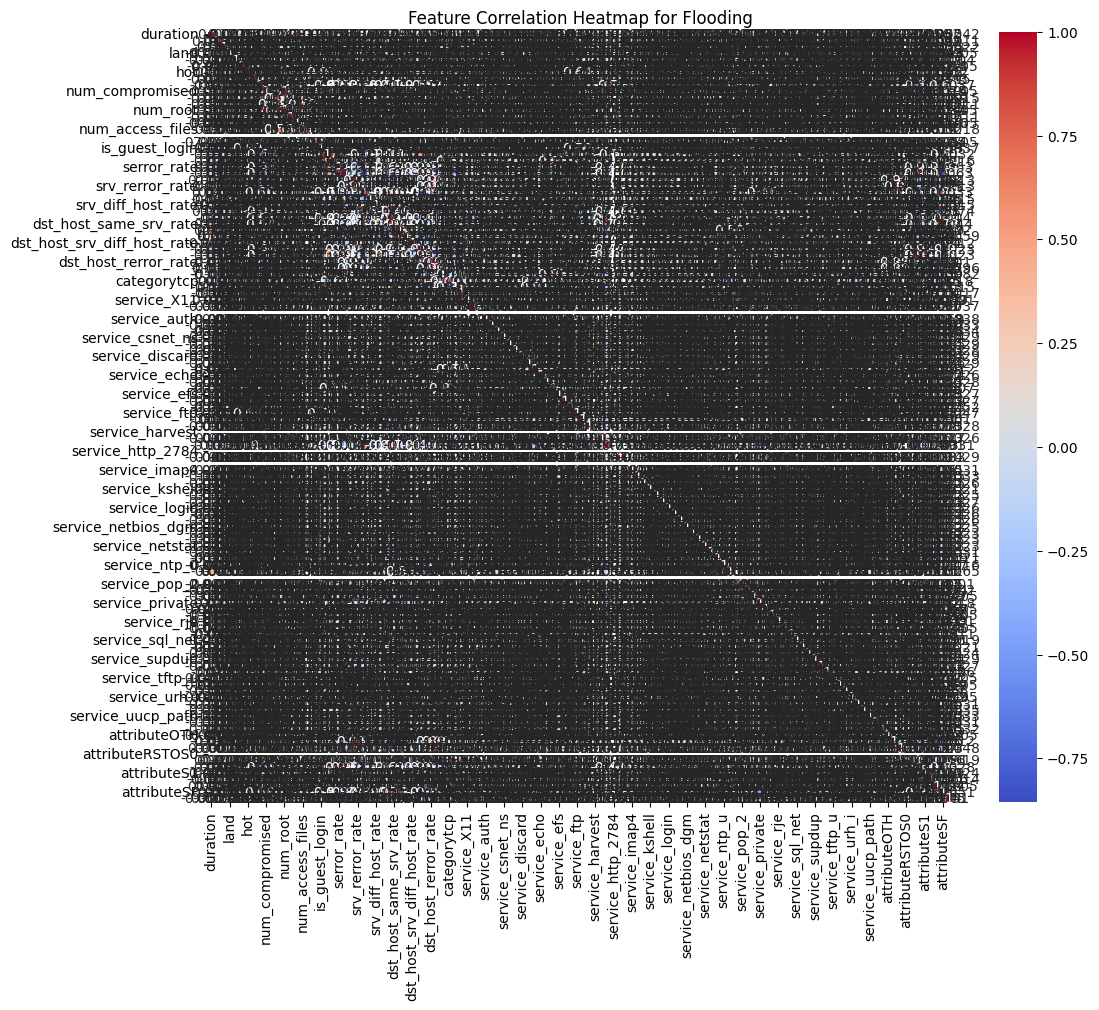

In [74]:
!pip install shap
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
import pandas as pd

X_Flooding_test_df = pd.DataFrame(X_Flooding_test, columns=colNames_test)
plt.figure(figsize=(12, 10))
sns.heatmap(X_Flooding_test_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap for Flooding")
plt.show()






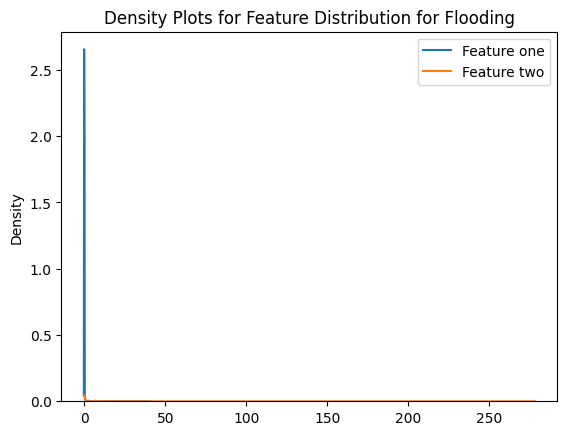

In [75]:
sns.kdeplot(X_Flooding_test[:, 0], label="Feature one")
sns.kdeplot(X_Flooding_test[:, 1], label="Feature two")
plt.title("Density Plots for Feature Distribution for Flooding")
plt.legend()
plt.show()





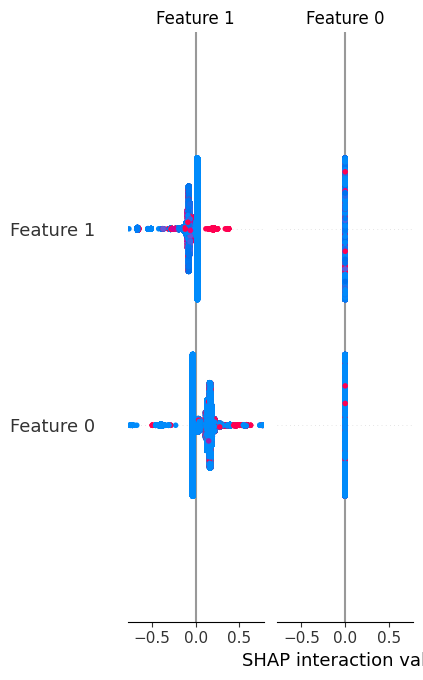

In [76]:
explainer = shap.TreeExplainer(clf_Flodding)
shap_values = explainer.shap_values(X_Flooding_test)
shap.summary_plot(shap_values, X_Flooding_test)

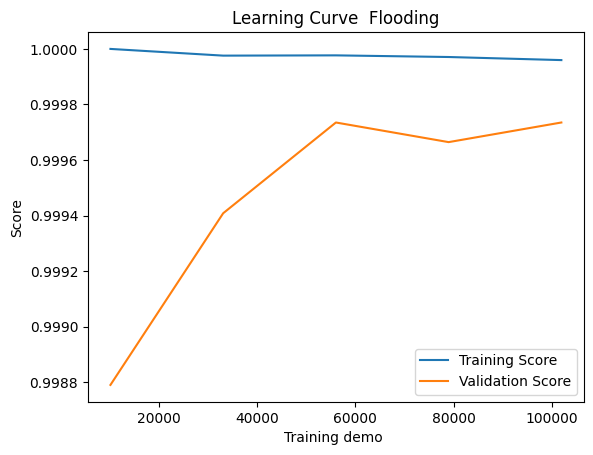

In [78]:
train_sizes, train_scores, test_scores = learning_curve(clf_Flodding, X_Flooding_test, Y_Flooding_test, cv=10)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Validation Score")
plt.title("Learning Curve  Flooding")
plt.xlabel("Training demo ")
plt.ylabel("Score")
plt.legend()
plt.show()

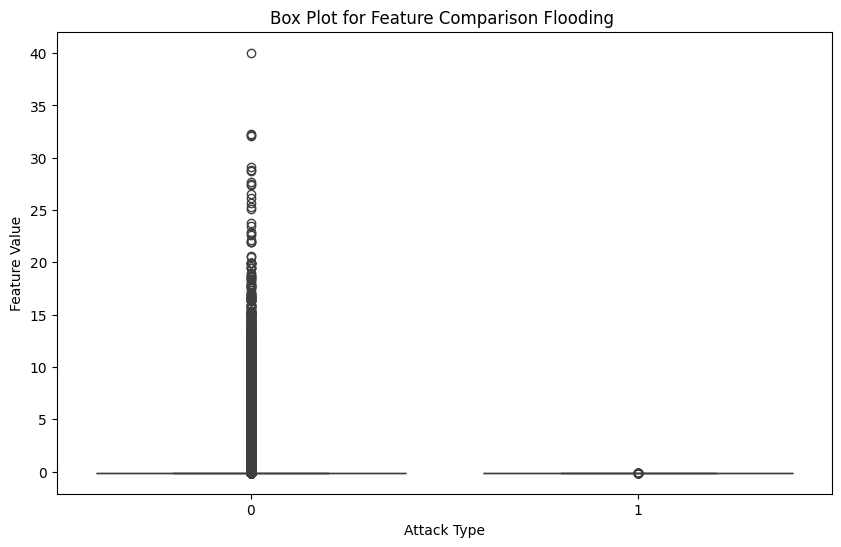

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=Y_Flooding_test, y=X_Flooding_test[:, 0])
plt.title("Box Plot for Feature Comparison Flooding ")
plt.xlabel("Attack Type")
plt.ylabel("Feature Value")
plt.show()



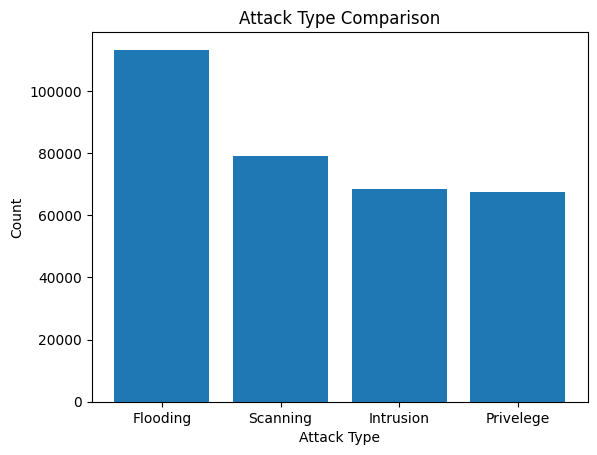

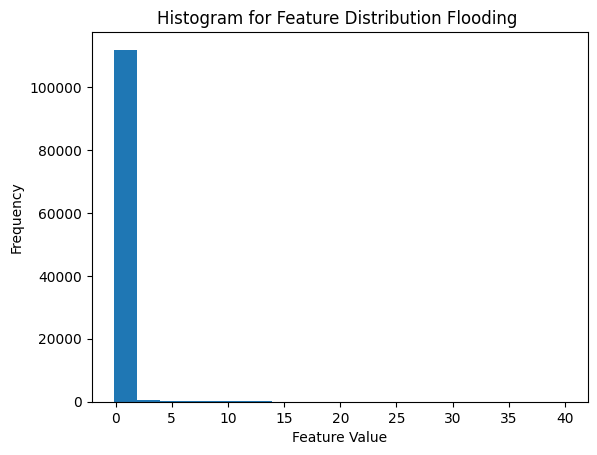

In [80]:
attack_counts = [len(Y_Flooding_test), len(Y_Scanning_test), len(Y_Intrusion_test), len(Y_Privilege_test)]
attack_types = ["Flooding", "Scanning", "Intrusion", "Privelege"]
plt.bar(attack_types, attack_counts)
plt.title("Attack Type Comparison")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.show()

plt.hist(X_Flooding_test[:, 0], bins=20)
plt.title("Histogram for Feature Distribution Flooding ")
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.show()
